# Car Price Prediction (Used Car)

### Step 1: Import Necessary Libraries

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
import pickle

### Step 2: Load and Explore the Dataset

In [56]:
df= pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [57]:
print(df.shape)

(301, 9)


### Checking Missing Value

In [58]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [59]:
# remove whitespaces
df.columns = df.columns.str.strip()

### Descriptive Statistics of Data

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [61]:
df.describe()

,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


### Step 3: EDA 

In [62]:
print(df.columns)

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


### 1. Histogram for Each Features

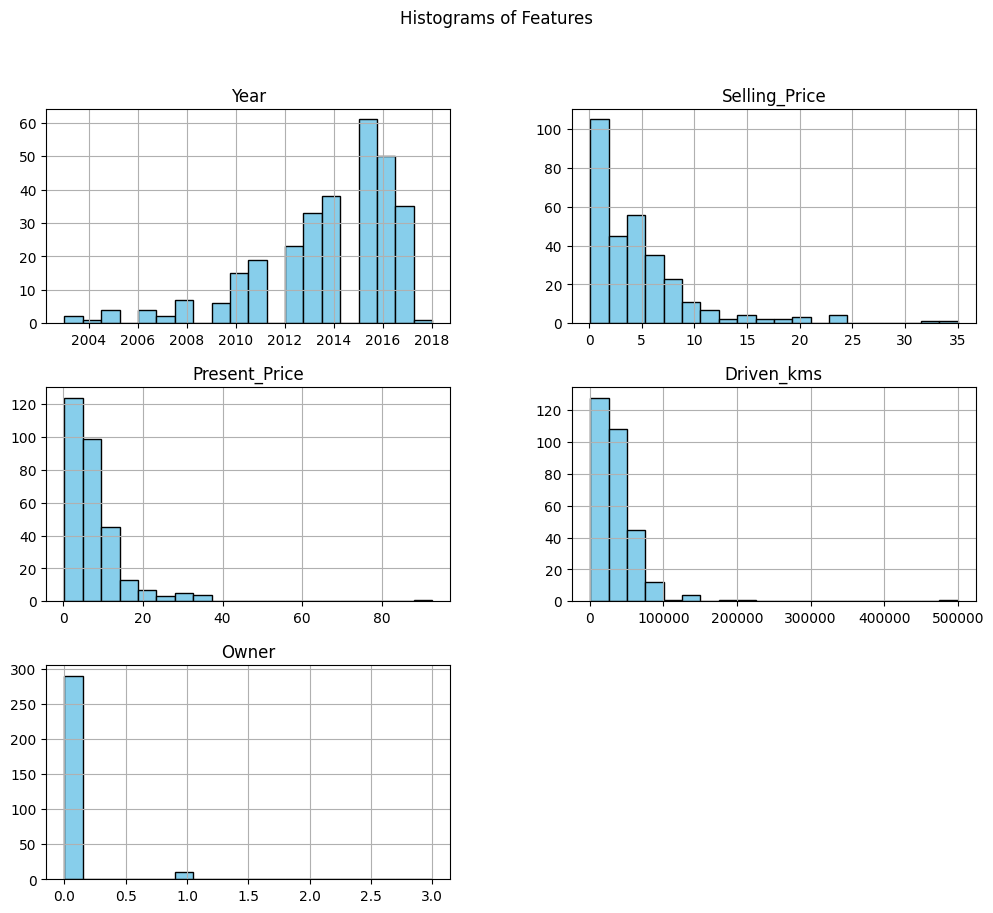

In [63]:
# Histogram for each feature
df.hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Features')
plt.show()

### 2.Distribution of Selling and Present Prices

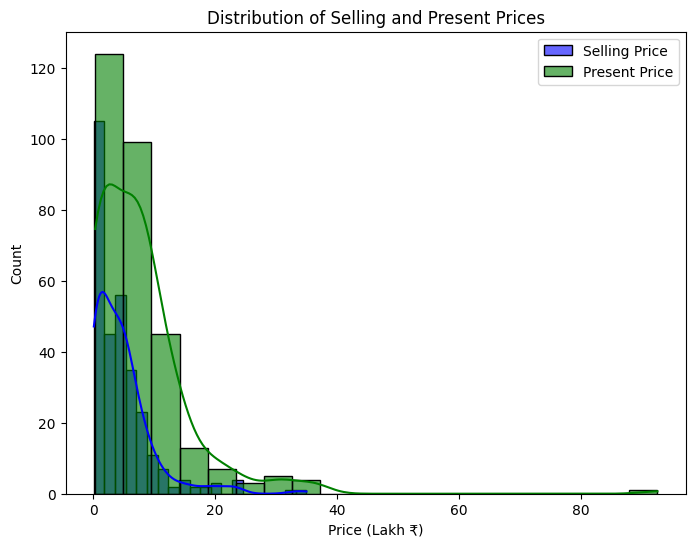

In [64]:
# Price Analysis
plt.figure(figsize=(8, 6))
sns.histplot(data=df['Selling_Price'], bins=20, kde=True, color='blue', label='Selling Price', alpha=0.6)
sns.histplot(data=df['Present_Price'], bins=20, kde=True, color='green', label='Present Price', alpha=0.6)
plt.title('Distribution of Selling and Present Prices')
plt.xlabel('Price (Lakh ₹)')
plt.ylabel('Count')
plt.legend()
plt.show()

### 3. Top 20 Car models - horizontal bar chart

In [65]:
#Car_Model Analysis
print("Unique cars Count:", df['Car_Name'].nunique())


Unique cars Count: 98


C:\Users\Joyal\AppData\Local\Temp\ipykernel_748\2314097301.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_car_models.values, y=top_car_models.index, palette='viridis')


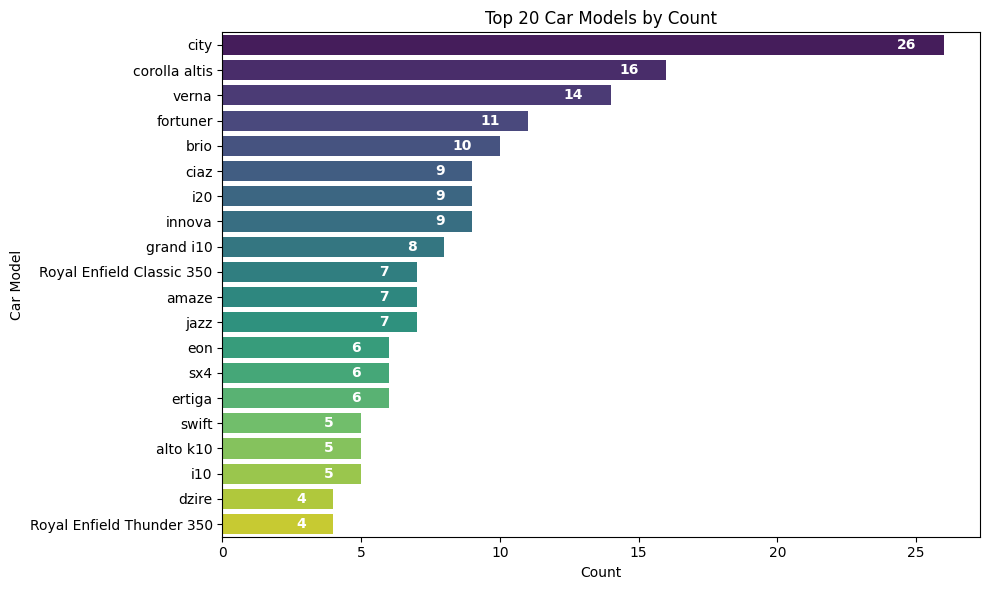

In [66]:
n = 20  # Number of top car models to plot
top_car_models = df['Car_Name'].value_counts().head(n)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_car_models.values, y=top_car_models.index, palette='viridis')
plt.title(f'Top {n} Car Models by Count')
plt.xlabel('Count')
plt.ylabel('Car Model')

# Add count labels **inside** the bars
for i, (value, name) in enumerate(zip(top_car_models.values, top_car_models.index)):
    ax.text(value - 1, i, str(value), va='center', ha='right', color='white', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### 4. Correlation Heatmap 

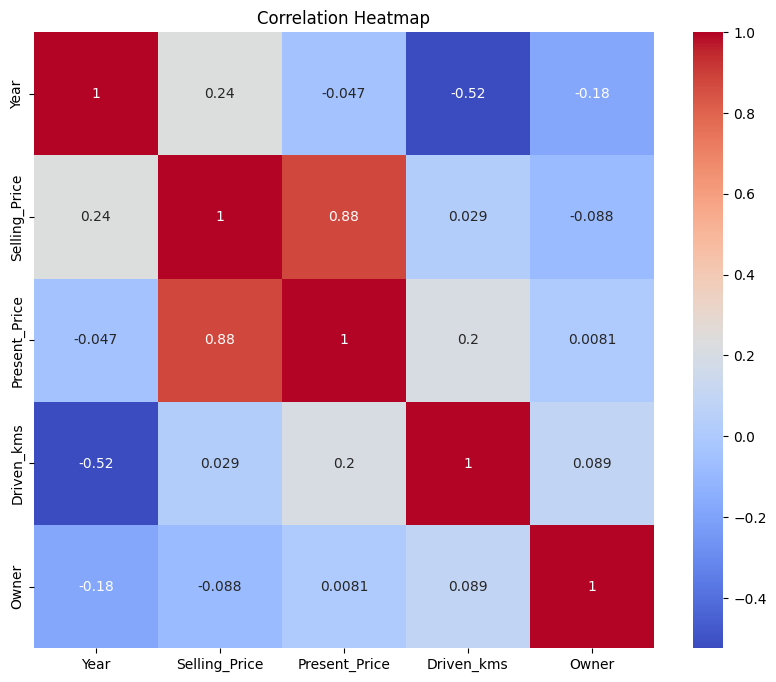

In [67]:
# Correlation Analysis
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


###  Pairplot of numerical features

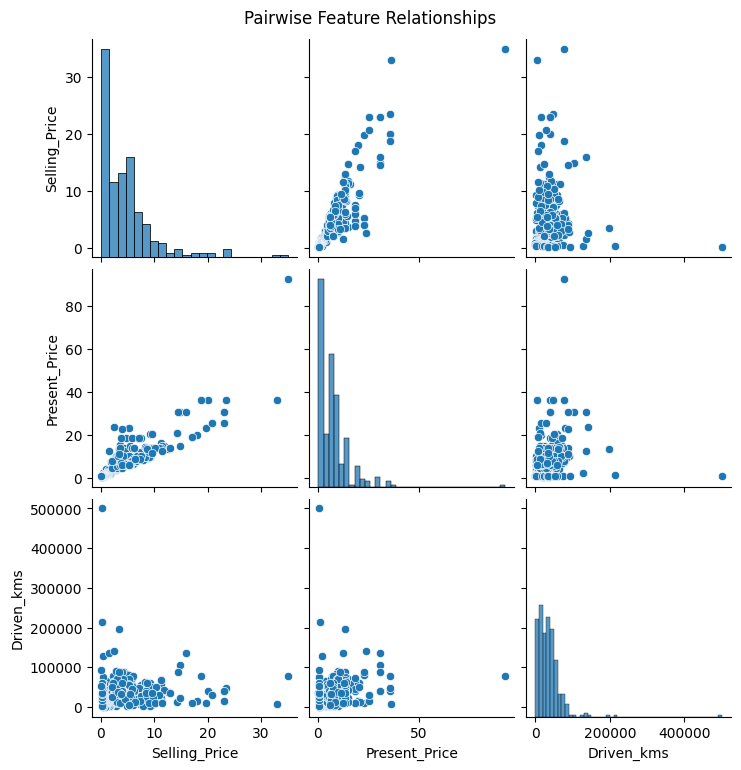

In [68]:

#sns.pairplot(df[['Selling_Price', 'Present_Price', 'Driven_kms']])
#plt.show()

sns.pairplot(df[['Selling_Price', 'Present_Price', 'Driven_kms']], markers=["o", "s", "D"])
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

Top 15 Average price for each Car type - Bar chart

C:\Users\Joyal\AppData\Local\Temp\ipykernel_748\2020239735.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(x=Top_car_models.values, y=Top_car_models.index,palette='viridis')


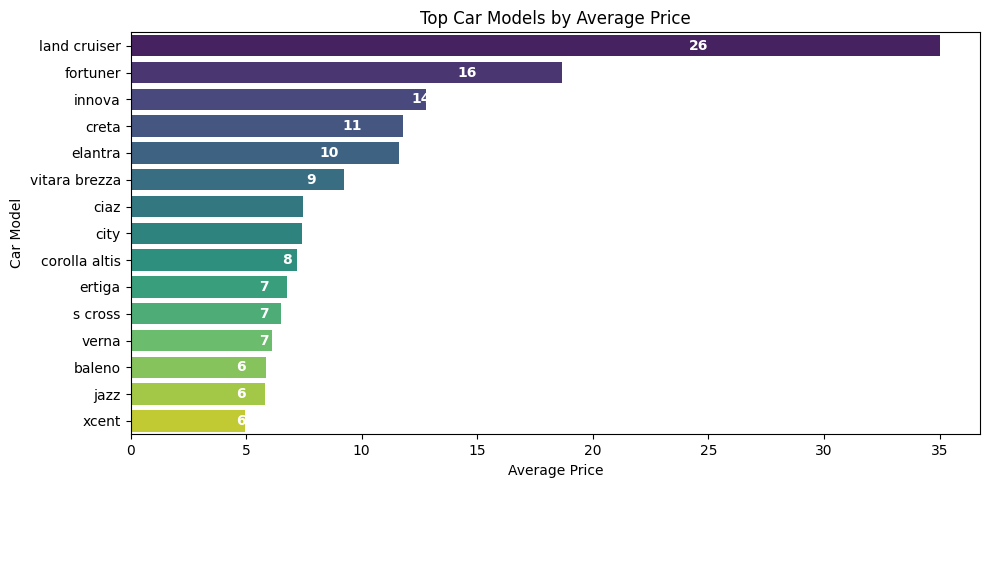

In [69]:
# Calculate average price for each car model
avg_prices_by_car = df.groupby('Car_Name')['Selling_Price'].mean().sort_values(ascending=False)

# Plot top car models by average price
Top_car_models = avg_prices_by_car.head(15)
plt.figure(figsize=(10, 6))
ax= sns.barplot(x=Top_car_models.values, y=Top_car_models.index,palette='viridis')
plt.title('Top Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')

for i, (value, name) in enumerate(zip(top_car_models.values, top_car_models.index)):
    ax.text(value - 1, i, str(value), va='center', ha='right', color='white', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


### Categorical Val vs Selling price - Outlier detection Box Plots

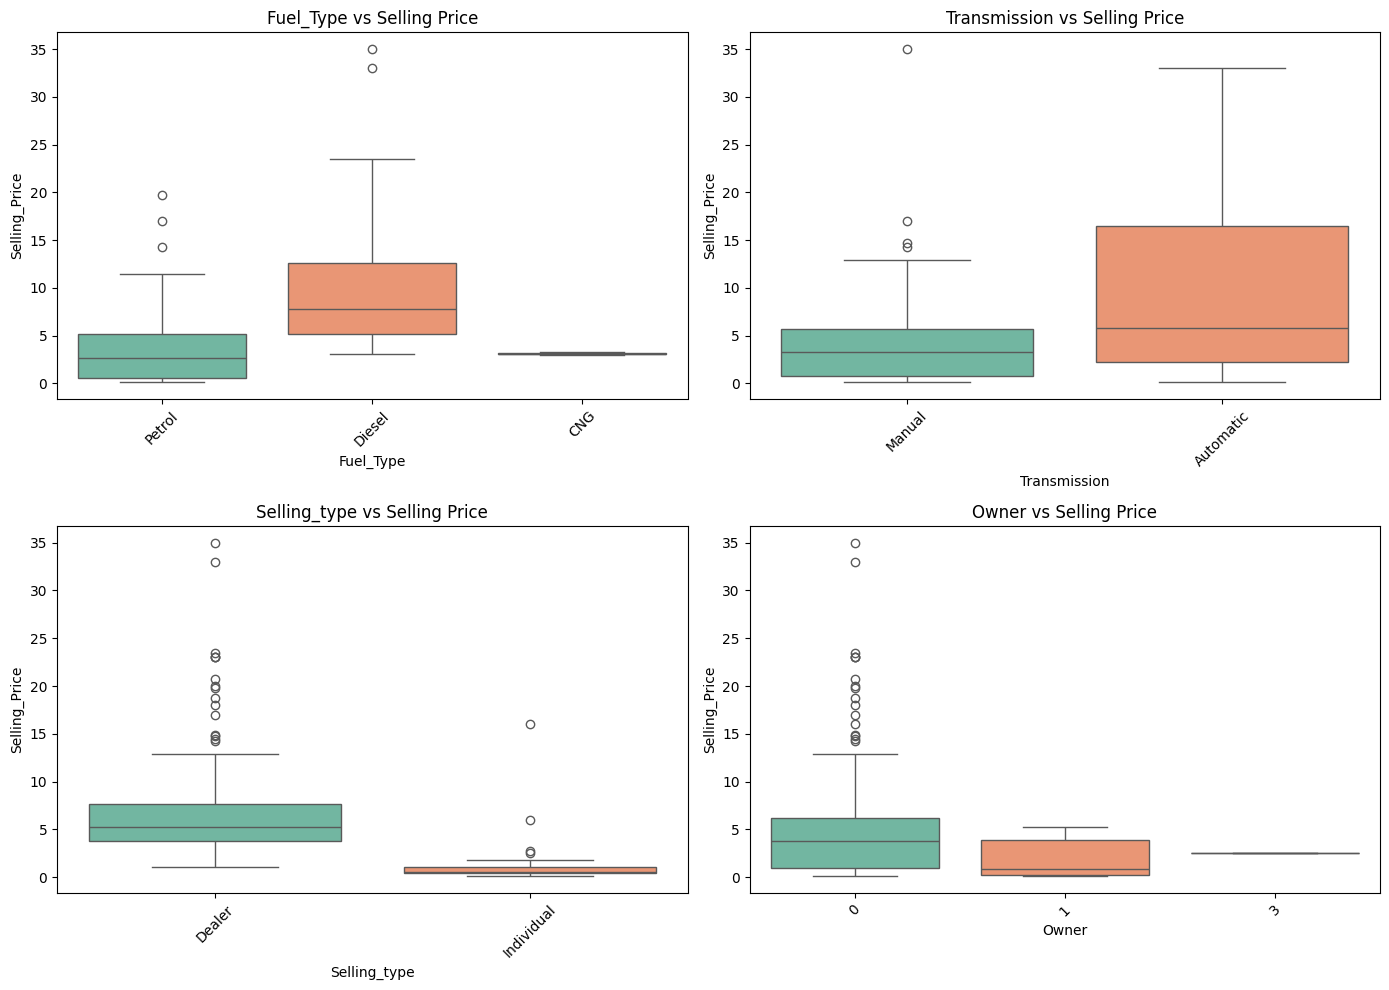

In [70]:
# Convert 'Owner' to categorical if needed
df['Owner'] = df['Owner'].astype(str)

# Plot all boxplots in one figure
cat_vars = ['Fuel_Type', 'Transmission', 'Selling_type', 'Owner']

# Create 2x2 subplot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Flatten 2D array to 1D for easy iteration

# Plot boxplots
for i, var in enumerate(cat_vars):
    sns.boxplot(x=var, y='Selling_Price', hue=var, data=df, ax=axes[i], palette='Set2', legend=False)
    axes[i].set_title(f'{var} vs Selling Price', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Step 4 : Model Training and evaluation

In [71]:
df['Brand'] = df['Car_Name'].apply(lambda x: x.split()[0])
df.drop('Car_Name', axis=1, inplace=True)

In [72]:
print("Unique car brands in the dataset:")
print(df['Brand'].unique())

Unique car brands in the dataset:
['ritz' 'sx4' 'ciaz' 'wagon' 'swift' 'vitara' 's' 'alto' 'ertiga' 'dzire'
 'ignis' '800' 'baleno' 'omni' 'fortuner' 'innova' 'corolla' 'etios'
 'camry' 'land' 'Royal' 'UM' 'KTM' 'Bajaj' 'Hyosung' 'Mahindra' 'Honda'
 'Yamaha' 'TVS' 'Hero' 'Activa' 'Suzuki' 'i20' 'grand' 'i10' 'eon' 'xcent'
 'elantra' 'creta' 'verna' 'city' 'brio' 'amaze' 'jazz']


In [73]:
# List of categorical columns
cat_cols = ['Brand','Fuel_Type', 'Selling_type', 'Transmission']
le = LabelEncoder() # Initialize label encoder

# Encode each categorical column
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [74]:
x = df.drop('Selling_Price', axis=1) #Feature
y = df['Selling_Price'] #Target var

### Model Training and Evaluation

In [84]:
# Function to select the best algorithm based on R² score
def best_ML_algorithm(x, y, algorithms):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

    results = {}

    for algorithm in algorithms:
        model = algorithm().fit(x_train, y_train)  # Train the model
        y_pred = model.predict(x_test)             # Predict on test set

        # Evaluation metrics
        MAE = metrics.mean_absolute_error(y_test, y_pred)
        MSE = metrics.mean_squared_error(y_test, y_pred)
        RMSE = np.sqrt(MSE)
        r2 = metrics.r2_score(y_test, y_pred)

        results[algorithm.__name__] = {
            'Mean Absolute Error': round(MAE, 4),
            'Mean Squared Error': round(MSE, 4),
            'Root Mean Squared Error': round(RMSE, 4),
            'R² score': round(r2, 4)
        }

    # Select algorithm with highest R² score
    best_algorithm = max(results.items(), key=lambda item: item[1]['R² score'])[0]
    return best_algorithm, results

# using above function try to identify the best algorithm - 
# [highest R² score as the best algorithm - Proportion of variance in dependent var, predictable from independent variable)]

# List of algorithms to evaluate
algorithms = [LinearRegression, DecisionTreeRegressor, RandomForestRegressor]

# Evaluate the algorithms
best_algo, result_dict = best_ML_algorithm(x, y, algorithms)

# Display results as DataFrame
results_df = pd.DataFrame(result_dict).T
print("📊 **Evaluation Metrics for All Algorithms:**")
print(results_df.to_string())

print(f"\n✅ **Best Algorithm based on R² Score:** {best_algo}")


📊 **Evaluation Metrics for All Algorithms:**
                       Mean Absolute Error  Mean Squared Error  Root Mean Squared Error  R² score
LinearRegression                    1.2733              3.5001                   1.8708    0.8771
DecisionTreeRegressor               0.5680              0.7961                   0.8923    0.9720
RandomForestRegressor               0.6473              1.3167                   1.1475    0.9538

✅ **Best Algorithm based on R² Score:** DecisionTreeRegressor


In [85]:
# Split the data using same parameters
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Train the model
model_regressor = RandomForestRegressor(
    n_estimators=100, max_depth=20, min_samples_leaf=1, min_samples_split=2, random_state=42
)
model_regressor.fit(x_train, y_train)

# Predict
y_pred = model_regressor.predict(x_test)

# Evaluation metrics
MAE = metrics.mean_absolute_error(y_test, y_pred)
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE = np.sqrt(MSE)
r2 = metrics.r2_score(y_test, y_pred)

print("\n**Manual Random Forest Regressor Results:**")
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"Root Mean Squared Error: {RMSE}")
print(f"R-squared: {r2}")



**Manual Random Forest Regressor Results:**
Mean Absolute Error: 0.6299186813186819
Mean Squared Error: 1.0785608923076935
Root Mean Squared Error: 1.0385378627222472
R-squared: 0.9621214688963421


### Save Pickle file 

In [87]:
import pickle
with open('Random.pkl', 'wb') as model_file:
    pickle.dump(model_regressor, model_file)

print("Model saved as Random.pkl.")


Model saved as Random.pkl.


In [88]:
# Load the model from 'gradient.pkl'
with open('Random.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

print("Model loaded successfully.")


Model loaded successfully.


### Conclusion

In this project, we focused on preprocessing the dataset by handling missing values, encoding categorical features, and applying log transformations and outlier removal for better model accuracy. We then trained multiple regression models, including Linear Regression, Decision Tree, Random Forest, and Gradient Boosting, evaluating their performance using metrics like MAE, MSE, RMSE, and R². 

The Gradient Boosting Regressor showed the best performance with the highest R² score, making it the ideal model for the task. Finally, we saved the trained model as gradient.pkl for future use and predictions.